# Fast Fourier Transform - Example

The below example showcases a basic application of the Fast Fourier Transform onto three signals:

1. [Sinc](https://en.wikipedia.org/wiki/Sinc_function)

$$f(x) = \begin{dcases}
            \frac{sin(x)}{x}, \ x \neq 0 \\
            1, \ x = 0
         \end{dcases}$$

2. Square

$$
    f(x) = \begin{dcases}
        1, \ -a \leq x \leq a \\
        0, \ x \geq a, x \leq -a
    \end{dcases}
$$

3. [Gaussian](https://en.wikipedia.org/wiki/Normal_distribution)

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}}
$$

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
sinc_f = lambda x : np.sin(x)/x

def sinc_f(x):
    if type(x) == np.ndarray:
        f = np.sin(x)/x
        f[np.isnan(f)] = 1.0
        return f.astype(np.float32)
    elif x == 0.0:
        return 1.0
    else:
        return np.sin(x)/x

gaussian = lambda x, a, sigma : (1/sigma*np.sqrt(2*np.pi))*np.exp(0.5*(-(x-a)**2/sigma**2))

def square_f(x, e_square):
    square = np.ones_like(x, dtype = np.float32)
    square[x < -e_square] = 0.0
    square[x > e_square] = 0.0
    return square

In [18]:
e_x = 100.0
e_square = 5.0
dt = 0.001
t = np.arange(-e_x, e_x, dt)

sinc = sinc_f(t)

gauss = gaussian(t, 0.0, 10.0).astype(np.float32)

square = square_f(t, e_square)

print(sinc_f(0.000001))

w = 100.0
sin = np.sin(w*t)

0.9999999999998334


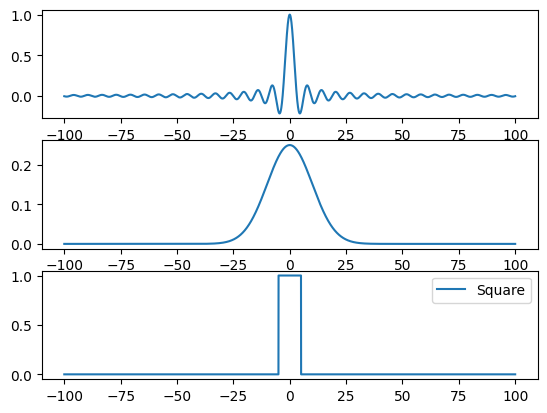

In [19]:
plt.subplot(311)
plt.plot(t, sinc, label = "Sinc")
plt.subplot(312)
plt.plot(t, gauss, label = "Gaussian")
plt.subplot(313)
plt.plot(t, square, label = "Square")
plt.legend()

The output of *np.fft.fftfreq* of *numpy* is in $\frac{cycles}{s}$. As a reminder:

$[f] = \frac{cycle}{s}$

$[w] = \frac{rad}{s}$

The relation between $f$ and $w$ is:

$w = 2\pi f$

In [20]:
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift

In [21]:
F_sinc = fft(sinc, sinc.shape[0])
F_sinc_freqs = 2*np.pi*fftfreq(sinc.size, d = dt)

F_square = fft(square, square.shape[0])
F_square_freqs = 2*np.pi*fftfreq(square.size, d = dt)

F_gauss = fft(gauss, gauss.shape[0])
F_gauss_freqs = 2*np.pi*fftfreq(gauss.size, d = dt)


100000


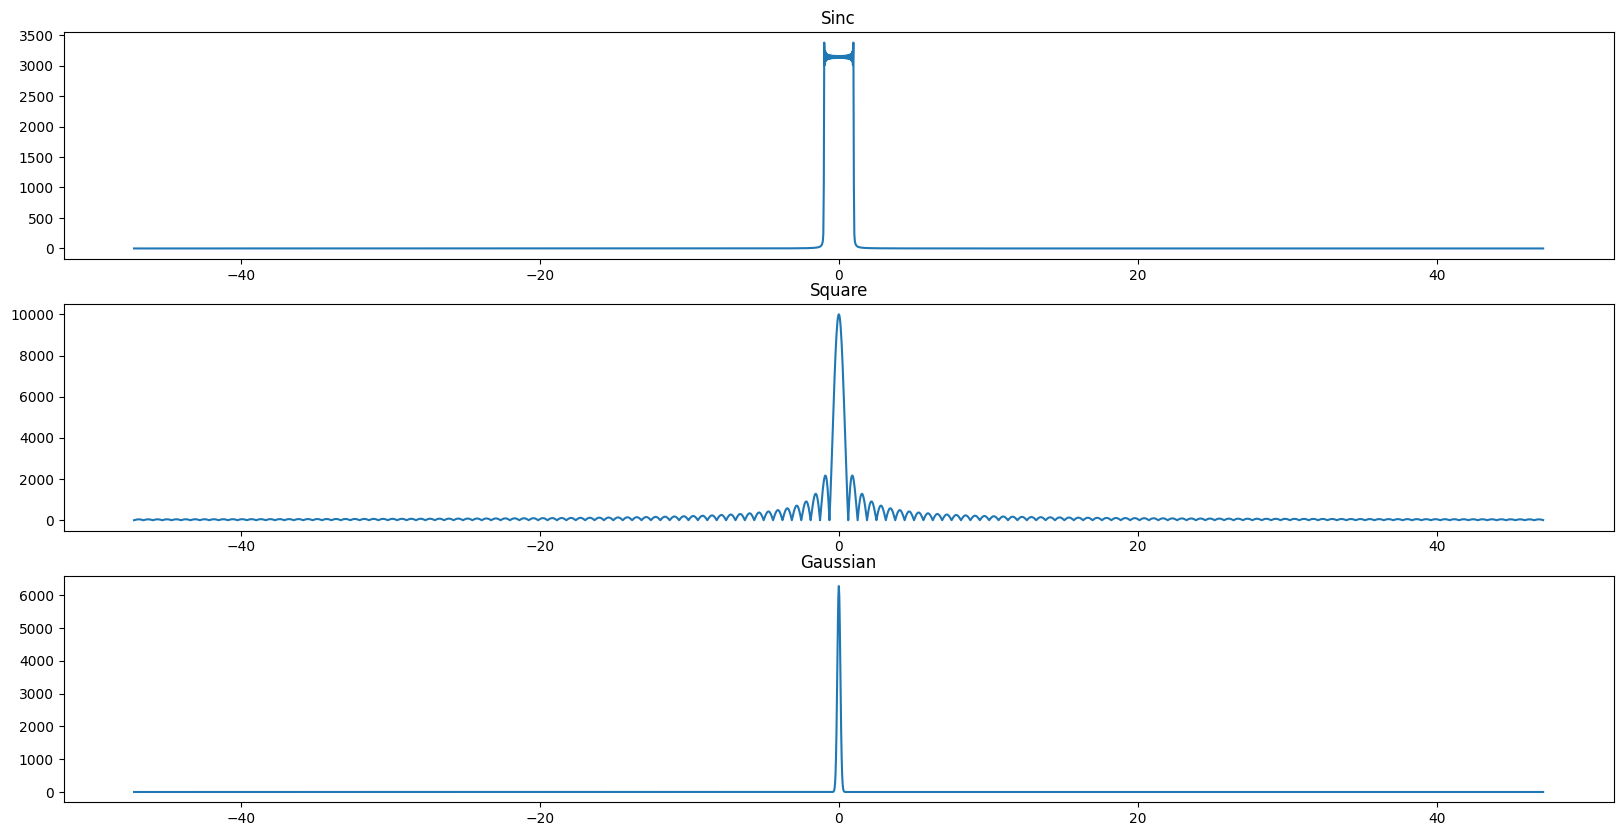

In [22]:
F_sinc = fftshift(F_sinc)
F_sinc_freqs = fftshift(F_sinc_freqs)

F_square = fftshift(F_square)
F_square_freqs = fftshift(F_square_freqs)

F_gauss = fftshift(F_gauss)
F_gauss_freqs = fftshift(F_gauss_freqs)

inv = ifft(F_gauss, F_gauss.shape[0])

center = t.size//2
print(center)
# b = t.size//2
b = 1500

plt.figure(figsize = (20, 10))
plt.subplot(311)
plt.plot(F_sinc_freqs[center - b:center + b], np.sqrt(F_sinc.real[center - b:center + b]**2 + F_sinc.imag[center - b:center + b]**2))
plt.title("Sinc")
plt.subplot(312)
plt.plot(F_square_freqs[center - b:center + b], np.sqrt(F_square.real[center - b:center + b]**2 + F_square.imag[center - b:center + b]**2))
plt.title("Square")
plt.subplot(313)
plt.plot(F_gauss_freqs[center - b:center + b], np.sqrt(F_gauss.real[center - b:center + b]**2 + F_gauss.imag[center - b:center + b]**2))
plt.title("Gaussian")
plt.show()

Something is worth noting: The actual fourier transform of the three functions are:

1. **Sinc** $\rightarrow$ Square
2. **Square** $\rightarrow$ Sinc
3. **Gaussian** $\rightarrow$ Gaussian

However, it can be seen above that the *FFT* of those three actually outputs a different FT format, that after a closer look, it is revealed to be the above expected functions *enveloping* a sinusoidal or some oscillatory function. My guess is that as we are dealing with a limited time window, those weird spectra are actually a "mistake" of the method when taking those into account, the so called "[Gibbs Phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon)". For more reference to that, some links:

[https://dsp.stackexchange.com/questions/10120/why-does-spectral-leakage-arise-in-an-fft](https://dsp.stackexchange.com/questions/10120/why-does-spectral-leakage-arise-in-an-fft)

[https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/leak.html](https://kls2177.github.io/Climate-and-Geophysical-Data-Analysis/chapters/Week6/leak.html)

If we apply an inverse fourier transform onto the processed signal, we will retrieve the original function, so it must be working:

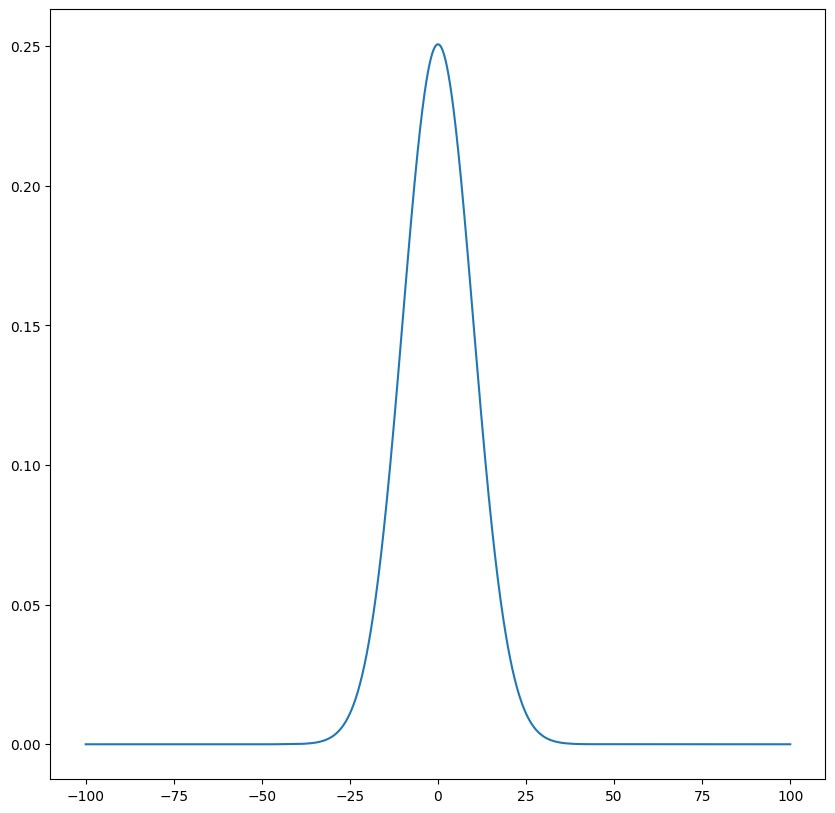

In [23]:
F_sinc = fftshift(F_sinc)
F_sinc_freqs = fftshift(F_sinc_freqs)

F_square = fftshift(F_square)
F_square_freqs = fftshift(F_square_freqs)

F_gauss = fftshift(F_gauss)
F_gauss_freqs = fftshift(F_gauss_freqs)

inv = ifft(F_gauss, F_gauss.shape[0])

plt.figure(figsize = (10, 10))
plt.plot(t, inv.real)

## FT manipulations

The FT of a function $f(t)$ can be manipulated in two ways:
1. Shifting
2. Scalling
3. Number of frequency bins

To *shift*, just multiply by a term $e^{iw_0t}$.

To *scale*, just multiply $t$ by a scalling factor $\alpha$.

To change the *number of frequency bins*, the sampling needs to be changed. By the Nyquist Rate, *higher* sampling means higher frequencies to be accounted for, which means higher frequency bins (frequency spectrum). This also applies for lower sampling. 

To change the frequency window of the FT, the $dt$ must be:

$$dt = \frac{1}{f_{window}}$$

With $f_{window}$ being the desired frequency window length.

We can then conclude that a FT with parameters control should be like:

$f(t, \alpha, w_0) = f(t, \alpha) \ e^{iw_0t}$

In [24]:
from pyMRI.pymri import max_frequency

In [25]:
e_x = 100.0

f_wind = 1e3 # Window param
dt = 1/f_wind
t = np.arange(-e_x, e_x, dt)

f = 10.0 # Scalling param
w = (2*np.pi)*f
w0 = (2*np.pi)*100.0 # central frequency shift

e_square = 5.0

In [26]:
max_f = max_frequency(-e_x, e_x, dt)

if w/(2*np.pi) < max_frequency(-e_x, e_x, dt):
    print(f"{w/(2*np.pi)} Hz will be captured by the sampling with maximum frequency of {max_f} Hz")
else:
    print(f"{w/(2*np.pi)} Hz will NOT be captured by the sampling with maximum frequency of {max_f} Hz")

shift_val = np.exp(1j*w0*t)

sinc = sinc_f(w*t)*shift_val
gauss = gaussian(w*t, 0.0, 10.0).astype(np.float32)*shift_val
square = square_f(w*t, e_square)*shift_val

10.0 Hz will be captured by the sampling with maximum frequency of 100000.0 Hz


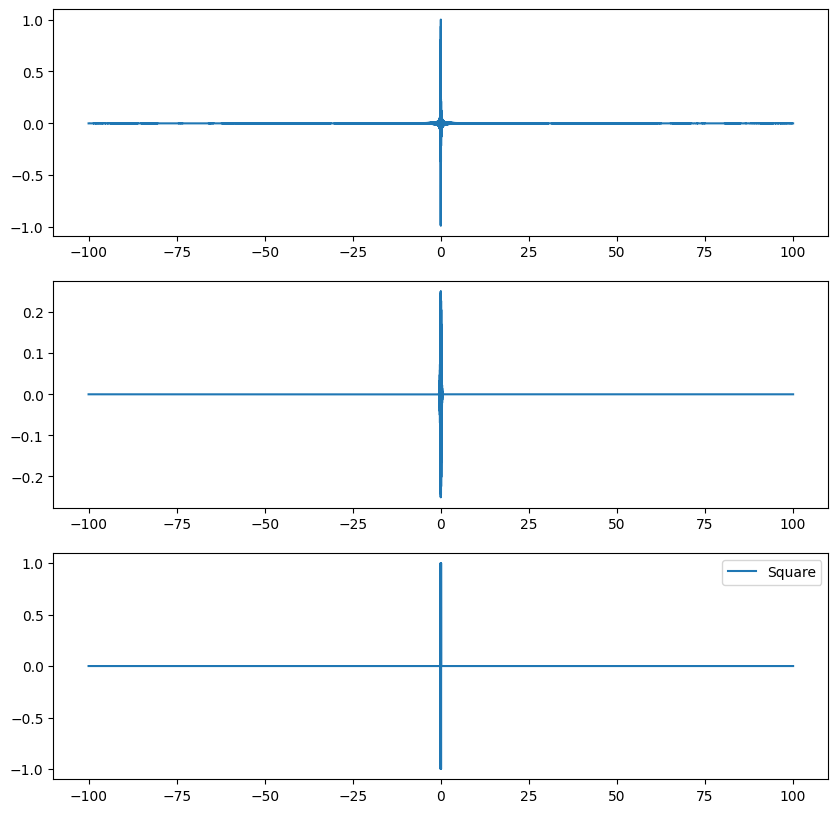

In [27]:
plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.plot(t, sinc.real, label = "Sinc")
plt.subplot(312)
plt.plot(t, gauss.real, label = "Gaussian")
plt.subplot(313)
plt.plot(t, square.real, label = "Square")
plt.legend()

In [28]:
F_sinc = fft(sinc, sinc.shape[0])
F_sinc_freqs = fftfreq(sinc.size, d = dt)

F_square = fft(square, square.shape[0])
F_square_freqs = fftfreq(square.size, d = dt)

F_gauss = fft(gauss, gauss.shape[0])
F_gauss_freqs = fftfreq(gauss.size, d = dt)


-500.0 499.995


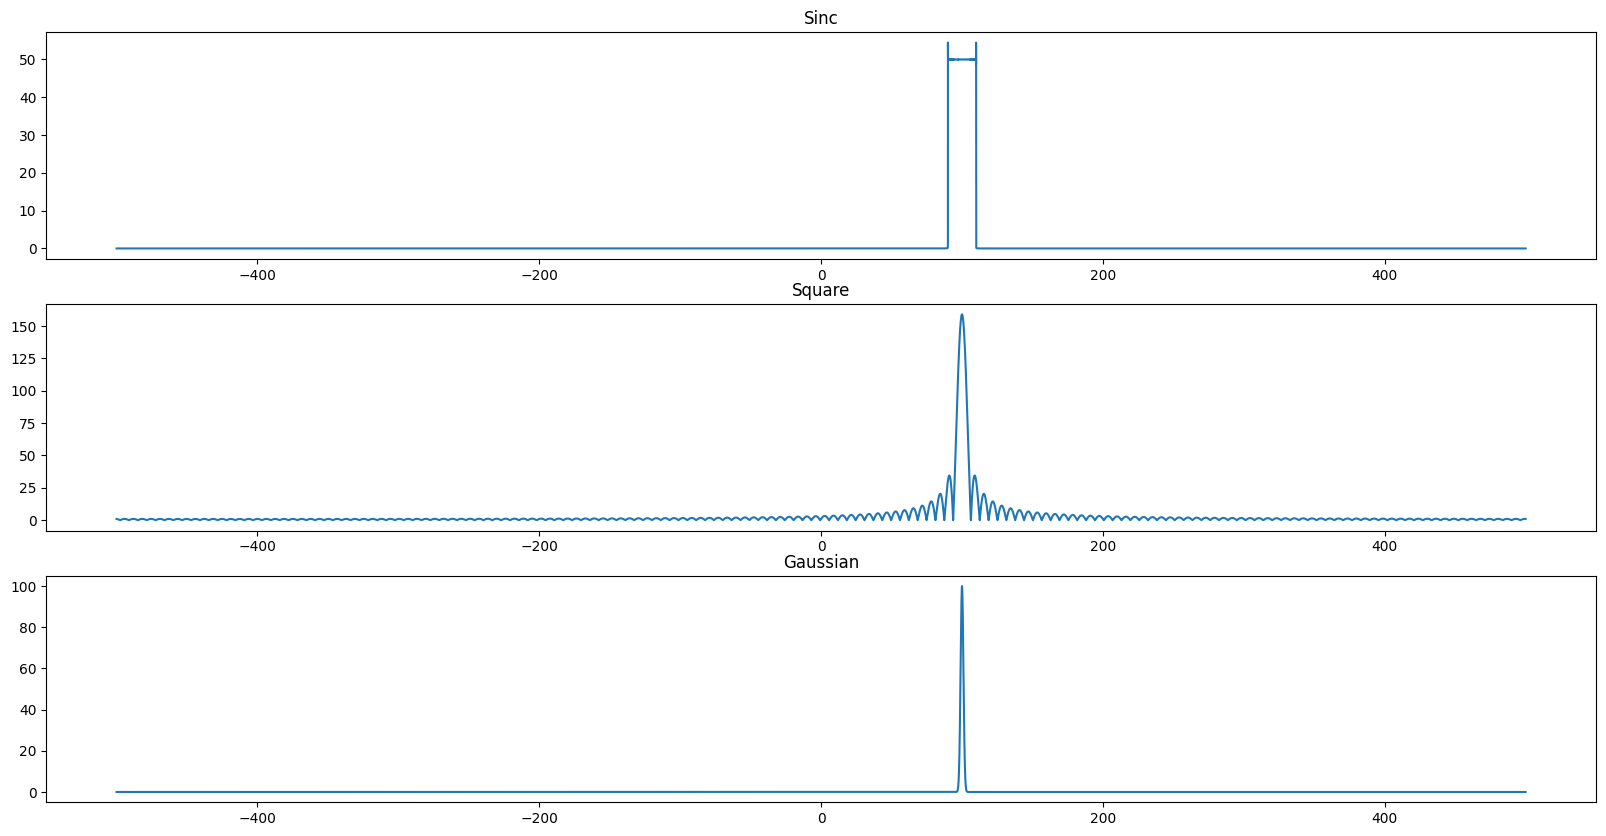

In [29]:
F_sinc = fftshift(F_sinc)
F_sinc_freqs = fftshift(F_sinc_freqs)

F_square = fftshift(F_square)
F_square_freqs = fftshift(F_square_freqs)

F_gauss = fftshift(F_gauss)
F_gauss_freqs = fftshift(F_gauss_freqs)

inv = ifft(F_gauss, F_gauss.shape[0])

center = t.size//2
b = t.size//2
print(F_gauss_freqs[0], F_gauss_freqs[-1])

plt.figure(figsize = (20, 10))
plt.subplot(311)
plt.plot(F_sinc_freqs[center - b:center + b], np.sqrt(F_sinc.real[center - b:center + b]**2 + F_sinc.imag[center - b:center + b]**2))
plt.title("Sinc")
plt.subplot(312)
plt.plot(F_square_freqs[center - b:center + b], np.sqrt(F_square.real[center - b:center + b]**2 + F_square.imag[center - b:center + b]**2))
plt.title("Square")
plt.subplot(313)
plt.plot(F_gauss_freqs[center - b:center + b], np.sqrt(F_gauss.real[center - b:center + b]**2 + F_gauss.imag[center - b:center + b]**2))
plt.title("Gaussian")
plt.show()

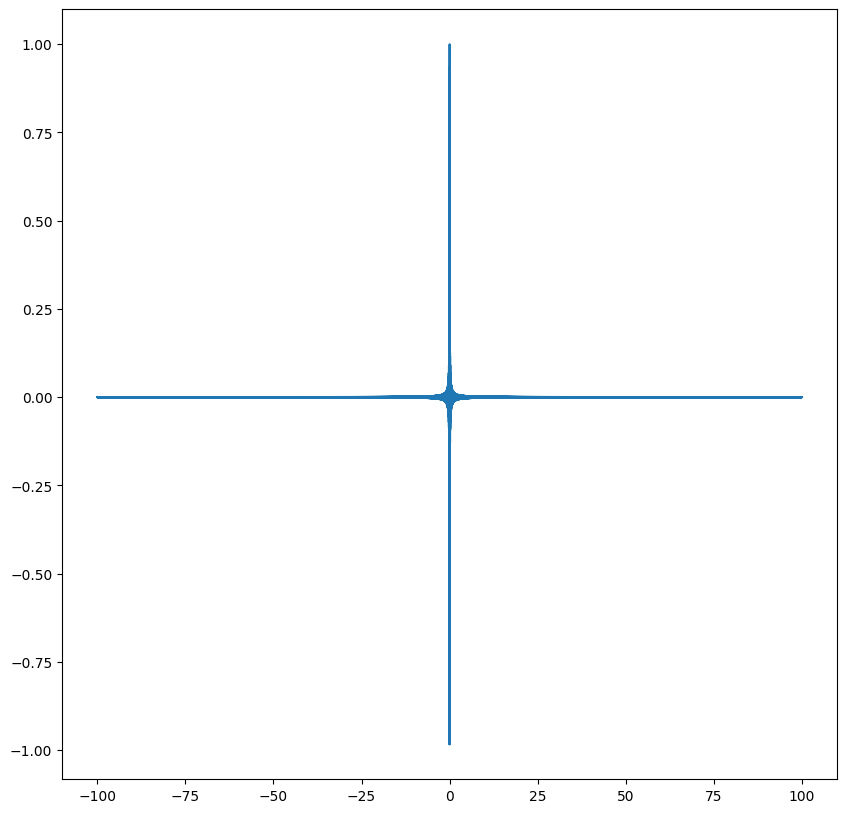

In [30]:
F_sinc = ifftshift(F_sinc)
F_sinc_freqs = ifftshift(F_sinc_freqs)

F_square = ifftshift(F_square)
F_square_freqs = ifftshift(F_square_freqs)

F_gauss = ifftshift(F_gauss)
F_gauss_freqs = ifftshift(F_gauss_freqs)

inv = ifft(F_sinc, F_sinc.shape[0])

plt.figure(figsize = (10, 10))
plt.plot(t, inv.real)

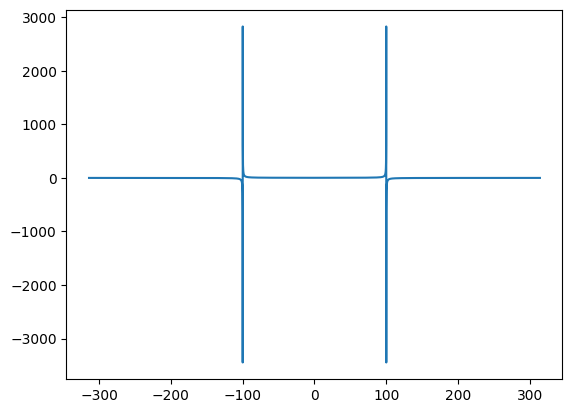

In [31]:
dt = 0.01
t = np.arange(0.0, 100.0, dt)
w11 = 100.0

f11 = np.sin(w11*t)

f11_fft = fft(f11, f11.size)
f11_freqs = 2*np.pi*fftfreq(f11_fft.size, d=dt)

f11_fft = fftshift(f11_fft)
f11_freqs = fftshift(f11_freqs)

plt.plot(f11_freqs, f11_fft.real)